In [16]:
#Loading the dataset
import pandas as pd
dataset = pd.read_csv('tweets.csv', encoding = 'ISO-8859-1')
dataset.head()


,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [18]:
def gen_freq(text):
    
    #List of words
    word_list = []
    
    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)
    
    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()
    
    #Print top 20 words
    word_freq[:20]
    
    return word_freq
gen_freq(dataset.text.str)
    

RT                                                                                     11053
to                                                                                      7650
is                                                                                      5152
in                                                                                      4491
the                                                                                     4331
of                                                                                      4053
#Demonetization                                                                         3253
demonetization                                                                          3162
on                                                                                      2751
#demonetization                                                                         2474
PM                                                                    

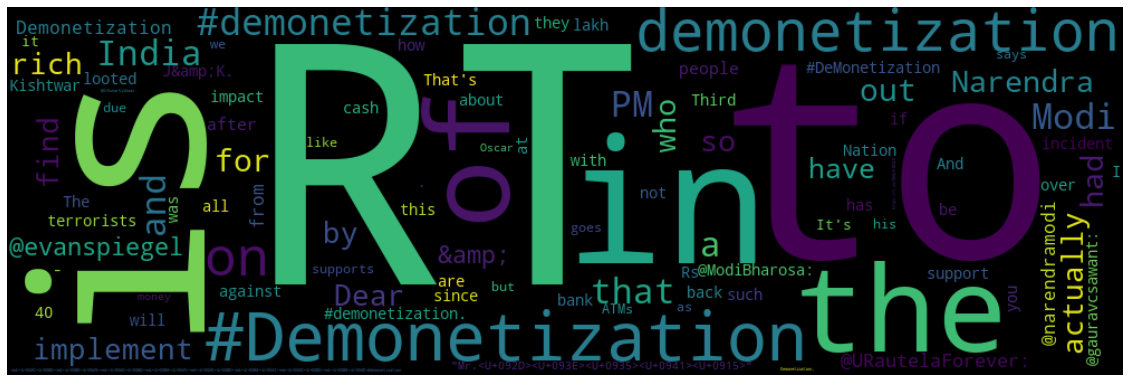

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_freq = gen_freq(dataset.text.str)

#Generate word cloud
wc = WordCloud(width=1000, height=330, max_words=100, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(20, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

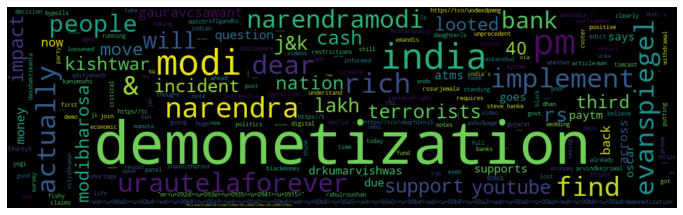

In [21]:
#Import re and list of stopwards
import re
from wordcloud import STOPWORDS

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)
    
    #Convert to lowercase to maintain consistency
    text = text.lower()
    
    return text

text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=1000, height=300, max_words=200, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()